In [35]:
#Importando las librerías necesarias 
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from base64 import b64decode, b64encode
from google.colab.patches import cv2_imshow
from imutils import paths
from PIL import Image
import numpy as np
import argparse
import pickle
import cv2
import os
import PIL
import io
import time

#Se fueron agregando todos los miembros del equipo a una carpeta como dataset 
name = 'Sebastian'
dataPath  = '/content/drive/MyDrive/Colab Notebooks/Face_recognition_data/Images'
personPath = dataPath + '/' + name
#Se creó la carpeto del compañero agregado
if not os.path.exists(personPath):
	os.makedirs(personPath)
	print("Carpeta Creada")

cap = cv2.VideoCapture('/content/drive/MyDrive/Colab Notebooks/Face_recognition_data/Videos/caras_sebastian.mp4')

#Inicialmente se utilizó CascadeClasificaier para la detección de los rostros pero posteriormente se cambió
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
faceNet = cv2.dnn.readNetFromCaffe("/content/drive/MyDrive/Colab Notebooks/face_detector/deploy.prototxt", "/content/drive/MyDrive/Colab Notebooks/face_detector/res10_300x300_ssd_iter_140000.caffemodel")

count = 0
#Se guradaba cada fotograma redimencionado
while True:
	ret, frame = cap.read()
	if ret == False: break
	frame =  imutils.resize(frame, width=640)
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	auxFrame = frame.copy()
	#faces = faceClassif.detectMultiScale(gray,1.3,5, flags=cv2.CASCADE_SCALE_IMAGE)
	(h, w) = frame.shape[:2]
	blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300),(104.0, 177.0, 123.0))
	faceNet.setInput(blob)
	detections = faceNet.forward()
	locs = []
	for i in range(0, detections.shape[2]):
			confidence = detections[0, 0, i, 2]
			if confidence > 0.5:
					box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
					(startX, startY, endX, endY) = box.astype("int")
					(startX, startY) = (max(0, startX), max(0, startY))
					(endX, endY) = (min(w - 1, endX), min(h - 1, endY))
					locs.append((startX, startY, endX, endY))
		#for (x,y,w,h) in faces:
	for (x,y,w,h) in locs:
		#cv2.rectangle(frame, (x,y),(w,h),(0,255,0),2)
		rostro = auxFrame[y:h,x:w]
		rostro = cv2.resize(rostro,(150,150),interpolation=cv2.INTER_CUBIC)
		#En un caso se tuvo que rotar las imagenes generadas
		#M=cv2.getRotationMatrix2D((150/2,150/2),-90,1)
		#imgo=cv2.warpAffine(rostro,M,(150,150))
		cv2.imwrite(personPath + '/rostro_{}.jpg'.format(count),rostro)
		print("Imagen rostro_{}.jpg".format(count))
		count = count + 1

	k =  cv2.waitKey(1)
	if k == 27 or count >= 500:
		break
cap.release()


Carpeta Creada
Imagen rostro_0.jpg
Imagen rostro_1.jpg
Imagen rostro_2.jpg
Imagen rostro_3.jpg
Imagen rostro_4.jpg
Imagen rostro_5.jpg
Imagen rostro_6.jpg
Imagen rostro_7.jpg
Imagen rostro_8.jpg
Imagen rostro_9.jpg
Imagen rostro_10.jpg
Imagen rostro_11.jpg
Imagen rostro_12.jpg
Imagen rostro_13.jpg
Imagen rostro_14.jpg
Imagen rostro_15.jpg
Imagen rostro_16.jpg
Imagen rostro_17.jpg
Imagen rostro_18.jpg
Imagen rostro_19.jpg
Imagen rostro_20.jpg
Imagen rostro_21.jpg
Imagen rostro_22.jpg
Imagen rostro_23.jpg
Imagen rostro_24.jpg
Imagen rostro_25.jpg
Imagen rostro_26.jpg
Imagen rostro_27.jpg
Imagen rostro_28.jpg
Imagen rostro_29.jpg
Imagen rostro_30.jpg
Imagen rostro_31.jpg
Imagen rostro_32.jpg
Imagen rostro_33.jpg
Imagen rostro_34.jpg
Imagen rostro_35.jpg
Imagen rostro_36.jpg
Imagen rostro_37.jpg
Imagen rostro_38.jpg
Imagen rostro_39.jpg
Imagen rostro_40.jpg
Imagen rostro_41.jpg
Imagen rostro_42.jpg
Imagen rostro_43.jpg
Imagen rostro_44.jpg
Imagen rostro_45.jpg
Imagen rostro_46.jpg
Imagen r

<class 'numpy.ndarray'>


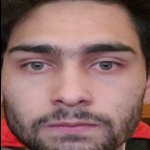

True

In [33]:
#Se creo un apequeña prueba para el tratamiento de datos rotados
from tensorflow.keras.preprocessing.image import load_img
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/Face_recognition_data/Images/Fabricio/rostro_0.jpg')
M=cv2.getRotationMatrix2D((150/2,150/2),-90,1)
imgo=cv2.warpAffine(img,M,(150,150))
'''imagen=img_to_array(img)
print(type(imagen),imagen.shape)
plt.imshow(imagen)'''
print(type(img))
cv2_imshow(imgo)
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Face_recognition_data/Images/Fabricio'+"/" + 'prueba.jpg',imgo)

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

#Se estableccioeron los parámetros iniciales del entrenamiento
INIT_LR = 1e-4
EPOCHS = 20
BS = 32
#Y se procedio a cargar los datos en la nube para trabajarlos en el entrenamiento y la validación
print("[INFO] loading images...")
path= "/content/drive/MyDrive/Colab Notebooks/Face_recognition_data/Images"
imagePaths = os.listdir(path)
data = []
labels = []
#Por cada sujeto se iteró y en en caso del dataset más grande se trunco a 5000 muestras
for imagePath in imagePaths:  
  imagePath2 = path +"/"+ imagePath
  i=0
  for t in os.listdir(imagePath2):
    if i<5000:
      p = imagePath2 + "/" + t
      label = p.split(os.path.sep)[-2]
      image = load_img(p, target_size=(224, 224))
      image = img_to_array(image)
      image = preprocess_input(image)
      i+=1
      # Se guardaron los datos y sus etiquetas identificadoras en listas
      data.append(image)
      labels.append(label)
    else:
      pass
#Informe de la carga
print("[INFO] images loaded")
print(len(labels))
data = np.array(data, dtype="float32")
labels = np.array(labels)
#Se aplicó un endoding binario a las etiquetas
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
#Se particionó la data en conjunto de entrenamiento y validación en 75%/25%
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.25, stratify=labels, random_state=42)
aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,fill_mode="nearest")

#Se cargó la red neuronal base que fue la de MobileNetV2
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

# Se contruyó el modelo agregado con el cual se busca mejorar y entrenar para el reconocimiento
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(5, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
#Se trunco el entrnamiento para el modelo base y que solo se adaptace el agragado
for layer in baseModel.layers:
	layer.trainable = False

print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

#Se comenzó con el entrenamiento de las capas agregadas
print("[INFO] training head...")
H = model.fit(aug.flow(trainX, trainY, batch_size=BS),	steps_per_epoch=len(trainX) // BS,validation_data=(testX, testY),validation_steps=len(testX) // BS,epochs=EPOCHS)

# Se aplicaron poredicciones para la evaluación
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

#El comportamiento y aprendizaje se reportó
print(classification_report(testY.argmax(axis=1), predIdxs,target_names=lb.classes_))

#Se guardó el modelo generado en la nube
print("[INFO] saving mask detector model...")
model.save("/content/drive/MyDrive/Colab Notebooks/Face_recognition_data/test_onlyteam.model", save_format="h5")

[INFO] loading images...
['Luis_Carlos', 'Mauricio', 'Pamela', 'Fabricio', 'Sebastian']
[INFO] images loaded
2500
[INFO] compiling model...
[INFO] training head...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
58/58 [==============================] - 84s 1s/step - loss: 0.4660 - accuracy: 0.4574 - val_loss: 0.2468 - val_accuracy: 0.9632
Epoch 2/20
58/58 [==============================] - 80s 1s/step - loss: 0.2160 - accuracy: 0.8855 - val_loss: 0.1327 - val_accuracy: 0.9680
Epoch 3/20
58/58 [==============================] - 80s 1s/step - loss: 0.1411 - accuracy: 0.9495 - val_loss: 0.0826 - val_accuracy: 0.9792
Epoch 4/20
58/58 [==============================] - 81s 1s/step - loss: 0.0972 - accuracy: 0.9767 - val_loss: 0.0582 - val_accuracy: 0.9792
Epoch 5/20
58/58 [==============================] - 81s 1s/step - loss: 0.0797 - accuracy: 0.9772 - val_loss: 0.0450 - val_accuracy: 0.9840
Epoch 6/20
58/58 [==============================] - 87s 2s/step - loss: 0.0627 - accuracy: 0.9843 - val_loss: 0.0373 - val_accuracy: 0.9872
Epoch 7/20
58/58 [==============================] - 83s 1s/step - loss: 0.0534 - accuracy: 0.9902 - val_loss: 0.0324 - val_accuracy: 0.9872
Epoch 8/20
58/58 [==

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


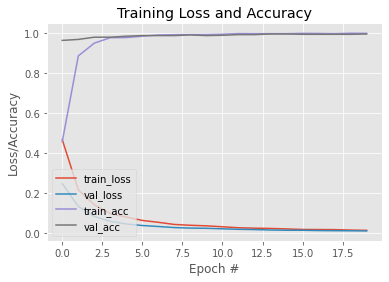

In [41]:
# Se ploteo y guardó el aprendizaje del modelo en la nube
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label='val_acc')
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Face_recognition_data/test.png")